In [3]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier


In [4]:
DataExpresso = pd.read_csv('/Users/booba/Downloads/Expresso_churn_dataset.csv')

In [5]:
DataExpresso.head(3)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0


In [6]:
print(DataExpresso.shape)

(2154048, 19)


In [7]:
print(DataExpresso.describe())

            MONTANT  FREQUENCE_RECH       REVENUE  ARPU_SEGMENT     FREQUENCE  \
count  1.397309e+06    1.397309e+06  1.428000e+06  1.428000e+06  1.428000e+06   
mean   5.532117e+03    1.152912e+01  5.510810e+03  1.836943e+03  1.397814e+01   
std    7.111339e+03    1.327407e+01  7.187113e+03  2.395700e+03  1.469403e+01   
min    1.000000e+01    1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    1.000000e+03    2.000000e+00  1.000000e+03  3.330000e+02  3.000000e+00   
50%    3.000000e+03    7.000000e+00  3.000000e+03  1.000000e+03  9.000000e+00   
75%    7.350000e+03    1.600000e+01  7.368000e+03  2.456000e+03  2.000000e+01   
max    4.700000e+05    1.330000e+02  5.321770e+05  1.773920e+05  9.100000e+01   

        DATA_VOLUME        ON_NET        ORANGE           TIGO          ZONE1  \
count  1.093615e+06  1.367373e+06  1.258800e+06  864032.000000  169721.000000   
mean   3.366450e+03  2.776891e+02  9.541871e+01      23.109253       8.170132   
std    1.330446e+04  8.7268

In [8]:
print(DataExpresso.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB
None


In [9]:
print(DataExpresso.isnull().sum())

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64


In [10]:
Missing_Values = DataExpresso.isnull().sum()

Missing_values_Percentage = ((Missing_Values/len(DataExpresso))*100)

print(Missing_values_Percentage)

user_id            0.000000
REGION            39.428044
TENURE             0.000000
MONTANT           35.131018
FREQUENCE_RECH    35.131018
REVENUE           33.706213
ARPU_SEGMENT      33.706213
FREQUENCE         33.706213
DATA_VOLUME       49.229776
ON_NET            36.520774
ORANGE            41.561191
TIGO              59.887988
ZONE1             92.120835
ZONE2             93.648052
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.902223
FREQ_TOP_PACK     41.902223
CHURN              0.000000
dtype: float64


1. Colonnes avec un fort pourcentage de valeurs manquantes (> 50%)
TIGO (59.88%), ZONE1 (92.12%), ZONE2 (93.64%)
🔹 Ces colonnes ont une très grande proportion de valeurs manquantes. Deux options :

Supprimer ces colonnes si elles ne sont pas essentielles pour l'analyse.
Les imputer avec une valeur par défaut (ex: 0 si elles représentent une quantité ou une fréquence, ou "Unknown" si elles sont catégorielles).
DATA_VOLUME (49.22%)
🔹 Il est probable que ces valeurs manquantes correspondent à des utilisateurs n’ayant pas consommé de data.

Imputation par 0 si l'absence de valeur signifie "aucune consommation de data".
Imputation par la médiane si les valeurs manquantes sont aléatoires.
2. Colonnes avec un pourcentage élevé de valeurs manquantes (30% - 50%)
MONTANT (35.13%), FREQUENCE_RECH (35.13%), REVENUE (33.70%), ARPU_SEGMENT (33.70%), FREQUENCE (33.70%)
🔹 Ces colonnes sont critiques car elles concernent des transactions financières et la fréquence d'utilisation.

Si les valeurs manquantes sont dues à l'absence d'activité d'un utilisateur, imputer par 0.
Sinon, imputer par la médiane ou via une méthode plus avancée (ex: modèles de régression basés sur d'autres variables comme REVENUE et FREQUENCE_RECH).
ON_NET (36.52%), ORANGE (41.56%)
🔹 Ces colonnes semblent représenter des usages télécom (appels, data, etc.).

Si la valeur manquante signifie "aucune activité" → imputer par 0.
Sinon, utiliser la médiane des utilisateurs ayant des profils similaires (même segment, même région).
TOP_PACK (41.90%), FREQ_TOP_PACK (41.90%)
🔹 Ces variables concernent probablement des abonnements ou offres souscrites.

Si l'absence signifie "pas d’abonnement", alors remplacer par "Aucun" ou 0.
Sinon, imputer par le mode (valeur la plus fréquente) ou prédire en fonction des autres variables.
3. Colonnes avec un pourcentage faible de valeurs manquantes (< 10%)
Rien à signaler ici, ces colonnes n'ont pas de valeurs manquantes.

In [11]:
from ydata_profiling import ProfileReport

# Crée le rapport Pandas Profiling
profile = ProfileReport(DataExpresso, title="Profiling Report -ExpressoChurn", explorative=True)

# Sauvegarde le rapport dans un fichier HTML
profile.to_file("/Users/booba/Desktop/mon_environnement/ExpressoChurn.html")

/Users/booba/miniconda3/envs/mon_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [12]:
print(DataExpresso.isnull().sum())

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64


In [ ]:
print(DataExpresso['REGION'].unique())


['FATICK' nan 'DAKAR' 'LOUGA' 'TAMBACOUNDA' 'KAOLACK' 'THIES'
 'SAINT-LOUIS' 'KOLDA' 'KAFFRINE' 'DIOURBEL' 'ZIGUINCHOR' 'MATAM'
 'SEDHIOU' 'KEDOUGOU']


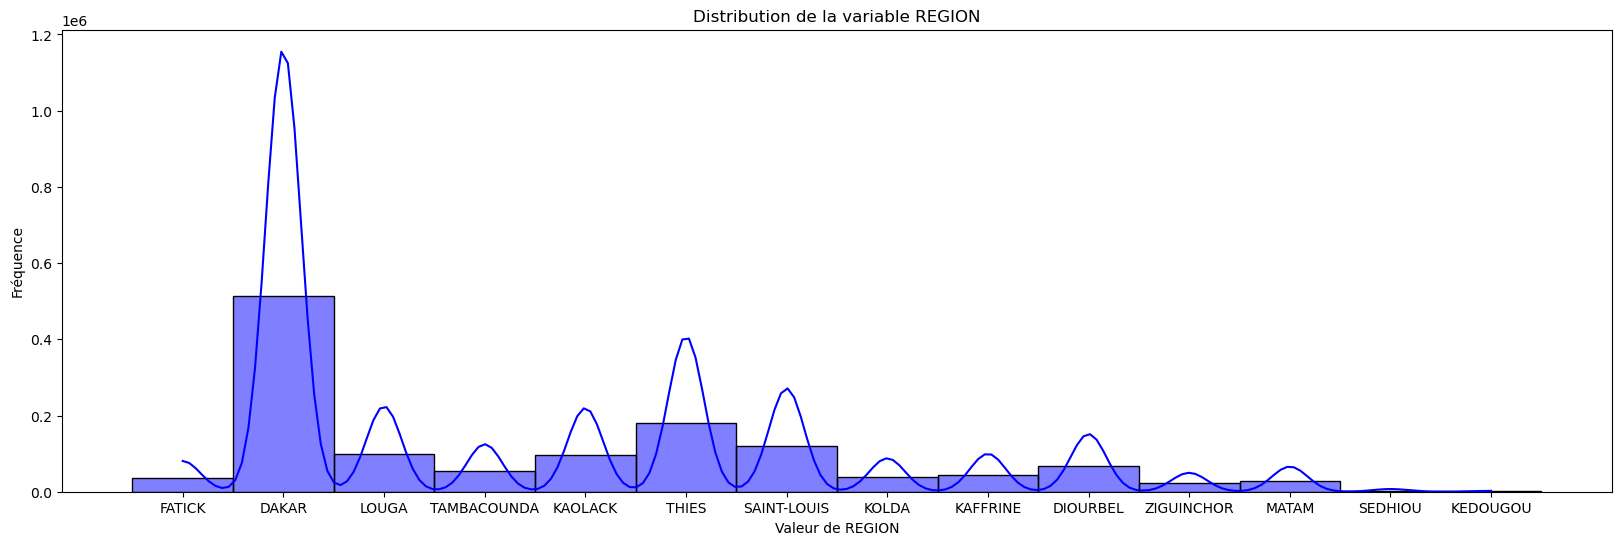

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20, 6))
sns.histplot(DataExpresso['REGION'], kde=True, color='blue', bins=30)
plt.title('Distribution de la variable REGION')
plt.xlabel('Valeur de REGION')
plt.ylabel('Fréquence')
plt.show()

In [ ]:
DataExpresso['REGION'].fillna(DataExpresso['REGION'].mode()[0], inplace=True)


# Vérifier si des valeurs manquantes subsistent
print(DataExpresso.isnull().sum())


user_id                 0
REGION                  0
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64


In [ ]:
print(DataExpresso.shape)

(2154048, 19)


In [13]:
# Suppression des colonnes TIGO, ZONE1, ZONE2
DataExpresso = DataExpresso.drop(columns=['TIGO', 'ZONE1', 'ZONE2'])

# Imputation par la médiane pour les colonnes numériques
cols_median = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
               'DATA_VOLUME', 'ON_NET', 'ORANGE']

for col in cols_median:
    DataExpresso[col].fillna(DataExpresso[col].median(), inplace=True)

# Imputation par le mode pour les colonnes catégorielles
cols_mode = ['TOP_PACK', 'FREQ_TOP_PACK']

for col in cols_mode:
    DataExpresso[col].fillna(DataExpresso[col].mode()[0], inplace=True)

# Vérification des valeurs manquantes après traitement
print(DataExpresso.isnull().sum())


/var/folders/fd/b6_hc3516_b4khq0dtrt_gpr0000gn/T/ipykernel_19800/1054793645.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DataExpresso[col].fillna(DataExpresso[col].median(), inplace=True)
/var/folders/fd/b6_hc3516_b4khq0dtrt_gpr0000gn/T/ipykernel_19800/1054793645.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

user_id                0
REGION            849299
TENURE                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
MRG                    0
REGULARITY             0
TOP_PACK               0
FREQ_TOP_PACK          0
CHURN                  0
dtype: int64


In [14]:
DataExpresso.duplicated().sum()

0

In [15]:
print(DataExpresso.shape)

(2154048, 16)


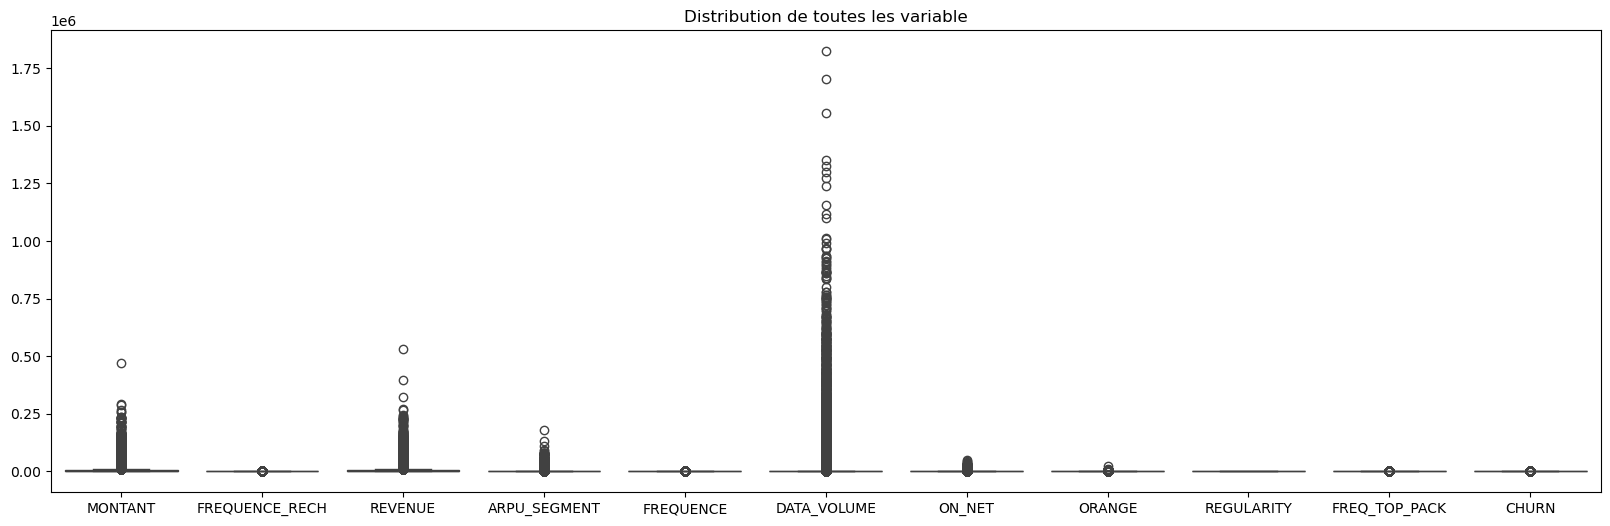

In [19]:
plt.figure(figsize=(20, 6))
sns.boxplot(DataExpresso, color='red')
plt.title('Distribution de toutes les variable')
plt.show()

In [20]:
# Liste des colonnes numériques sur lesquelles appliquer la méthode IQR, en excluant 'CHURN'
numeric_cols = [col for col in DataExpresso.select_dtypes(include=np.number).columns if col != 'CHURN']

# Fonction pour remplacer les outliers par la médiane
def replace_outliers_with_median(df, columns):
    df_cleaned = df.copy()  # On fait une copie pour éviter de modifier le DataFrame original
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)  # 1er quartile
        Q3 = df_cleaned[col].quantile(0.75)  # 3e quartile
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remplacement des outliers par la médiane
        median_value = df_cleaned[col].median()
        df_cleaned[col] = np.where((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound), median_value, df_cleaned[col])
    
    return df_cleaned

# Appliquer la méthode IQR pour remplacer les outliers par la médiane sur les colonnes numériques (sauf 'CHURN')
DataExpresso_cleaned = replace_outliers_with_median(DataExpresso, numeric_cols)

# S'assurer que 'CHURN' reste inchangé
DataExpresso_cleaned['CHURN'] = DataExpresso['CHURN']

# Vérifier qu'on a bien un DataFrame
print(type(DataExpresso_cleaned))  # Doit afficher "<class 'pandas.core.frame.DataFrame'>"

# Afficher le nombre de lignes (inchangé car on remplace seulement les valeurs)
print(f"Nombre de lignes après nettoyage : {DataExpresso_cleaned.shape[0]}")

# Vérifier la répartition des classes de 'CHURN'
print(DataExpresso_cleaned['CHURN'].value_counts())



<class 'pandas.core.frame.DataFrame'>
Nombre de lignes après nettoyage : 2154048
CHURN
0    1750062
1     403986
Name: count, dtype: int64


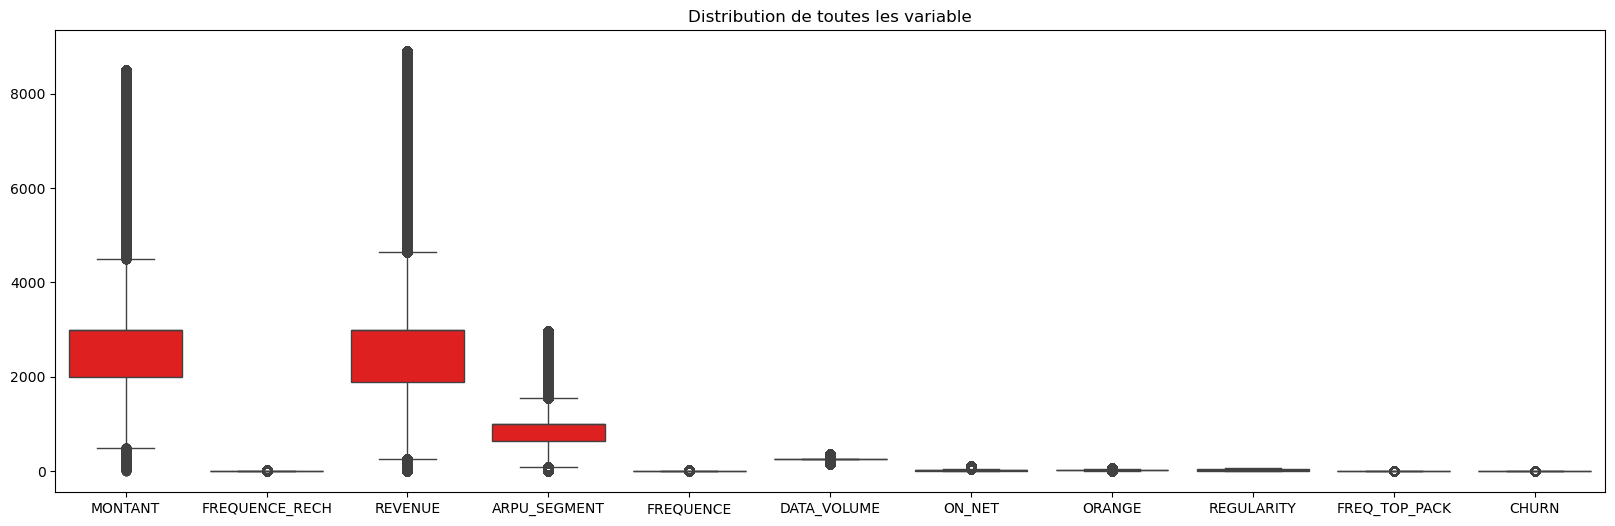

In [21]:
plt.figure(figsize=(20, 6))
sns.boxplot(DataExpresso_cleaned, color='red')
plt.title('Distribution de toutes les variable')
plt.show()

In [22]:
# Encodage des variables catégoriques
label_encoders = {}
for col in DataExpresso_cleaned.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    DataExpresso_cleaned[col] = label_encoders[col].fit_transform(DataExpresso_cleaned[col])

In [23]:
print(DataExpresso_cleaned.shape)
print(DataExpresso.shape)

(2154048, 16)
(2154048, 16)


In [24]:
print(DataExpresso_cleaned.info())


print(DataExpresso.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int64  
 1   REGION          int64  
 2   TENURE          int64  
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  MRG             int64  
 12  REGULARITY      float64
 13  TOP_PACK        int64  
 14  FREQ_TOP_PACK   float64
 15  CHURN           int64  
dtypes: float64(10), int64(6)
memory usage: 262.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH 

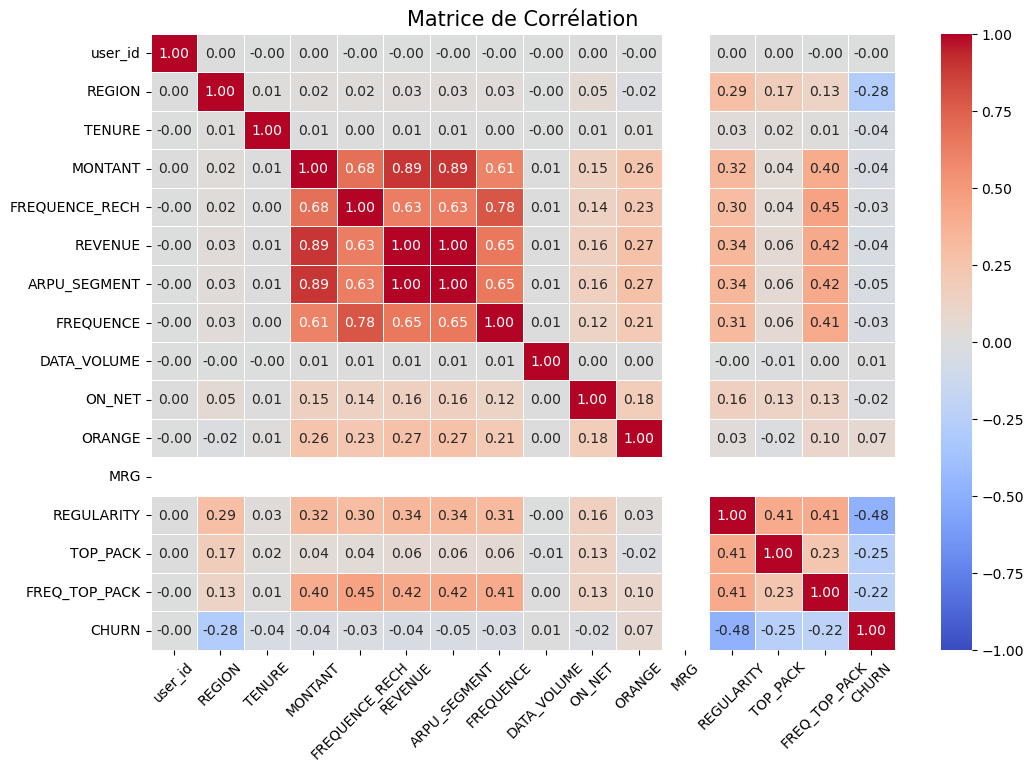

In [ ]:
correlation_matrix = DataExpresso_cleaned.corr()


# 2. Visualisation avec Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,       # Afficher les valeurs
    cmap="coolwarm",  # Choix de couleurs
    fmt=".2f",        # Format à 2 décimales
    linewidths=0.5,
    vmin=-1,          # Échelle de -1 à 1
    vmax=1
)

plt.title("Matrice de Corrélation", fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [25]:
print(DataExpresso['CHURN'].value_counts())


CHURN
0    1750062
1     403986
Name: count, dtype: int64


In [26]:
X = DataExpresso_cleaned.drop('CHURN', axis=1)
y = DataExpresso_cleaned['CHURN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [27]:
print(DataExpresso_cleaned['CHURN'].value_counts())  # Vérifier la répartition


CHURN
0    1750062
1     403986
Name: count, dtype: int64


In [28]:
print(np.unique(y_train, return_counts=True))


(array([0, 1]), array([1400049,  323189]))


In [29]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{0: 1400049, 1: 323189}


In [30]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from xgboost import XGBClassifier

model1 = XGBClassifier()
model1.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 87.94%


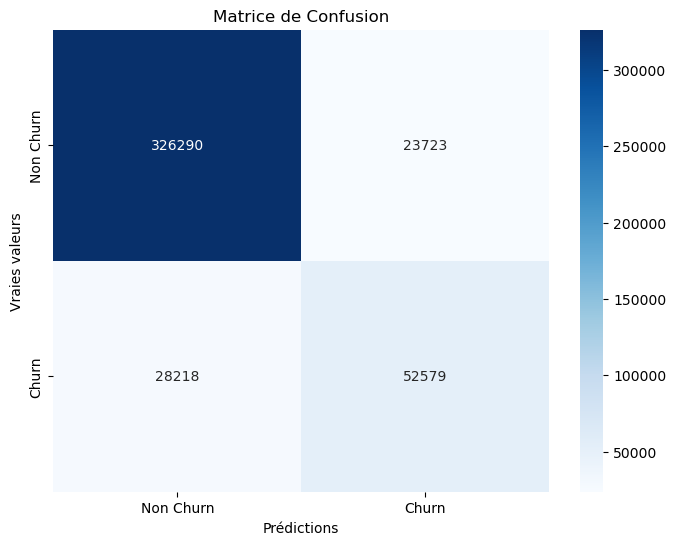

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Après l'entraînement du modèle
y_predX = model1.predict(X_test)

# 1. Calcul de l'accuracy
accuracy1 = accuracy_score(y_test, y_predX)
print(f"Accuracy: {accuracy1:.2%}")

# 2. Matrice de confusion
conf_matrix1 = confusion_matrix(y_test, y_predX)

# Visualisation avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Non Churn', 'Churn'],
            yticklabels=['Non Churn', 'Churn'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
import pickle
# Save artifacts using pickle
with open('encoder.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model1, f)